Notebook for Optim application. Notebook for supplementary material of a submitted publication. 

### Imports and settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json


%matplotlib widget
import time
import numpy as np
from aeromaps import create_process
from aeromaps.core.models import (
    models_optim_simple,
)

import gemseo as gm

gm.configure_logger()

<RootLogger root (INFO)>

# 1- Scenario initialisation and settings

The first phase corresponds to running a first, central scenario with AeroMAPS. Other runs ar performed afterwards.

In [2]:
from aeromaps.utils.functions import create_partitioning

In [3]:
create_partitioning(file="data_optim/aeroscope_europe_data.csv", path="data_optim")

## 2. Run AeroMAPS on this studied scope

In [4]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import default_models_top_down

In [5]:
models = {
    "models_optim_simple": models_optim_simple,
}

Create process as usual, the partitionning is recuperated as specified in the config file.

In [6]:
process = create_process(
    configuration_file="data_optim/config.json", models=models, use_fleet_model=False
)

## 1-a) Air traffic evolution

As of April 2024, AeroMAPS is considering an exgenous growth rate.
For the purposes of this article, an uniform growth rate of 3% is set. This is significantly lower from industry prospects such as [Airbus GMF: 3.6%](https://www.airbus.com/en/products-services/commercial-aircraft/market/global-market-forecast) or [Boeing CMO: 3.8%](https://www.boeing.com/content/dam/boeing/boeingdotcom/market/assets/downloads/CMO_2022_Report_FINAL_v02.pdf), but higher than [IEA Net Zero: 2.1% (2019 as base year)](https://www.iea.org/reports/net-zero-roadmap-a-global-pathway-to-keep-the-15-0c-goal-in-reach).


In [7]:
## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [1.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [1.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [1.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [1.0]

## 1-b) Aircraft fleet

Top-down fleet, without hydrogen aircraft, callibrated on the fleet of the MACC applciation, with drop-in instead of h2  
http://localhost:8888/lab/tree/aeromaps/notebooks/data_cost/top_down_cost_callibration_phd.ipynb

Mean annual efficiency improvement: 1.4% --> applied to all catgeories

In [8]:
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.4]
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.4]
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.4]

## Hydrogen aircraft
# NONE

### 1-c) Operational improvements

Operational improvements are considered via two opportunities. 
- Load factor improvement: improvement to 89% at the end of the scenario.
- Operational efficiency (better ATM, aircrfat MRO and operational optimisation): improvement of 8% in 25y. 

Cost savings incur through the fuel savings. However, it could come at an extra cost (non-energy). This parameter is modelled, but not considered in this article due to lack of specific informations to the best of our knowldege.


In [9]:
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [10]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

## 1-d) Energy

Top-down callibrated on the values of teh MACC apllication.
Faster optim but caution as MFSP full computation is more detailled: larges use of e-fuel in the begining influence late mFSp (no-decomissioning)

In [11]:
# # Energy settings: production choices

# # Aircraft energy - Introduction of alternative drop-in fuels

# ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2030, 2035, 2040, 2045, 2050]
# process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]
process.parameters.electrofuel_share_reference_years = [2030, 2035, 2040, 2045, 2050]
# process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]


## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = []
process.parameters.biofuel_hefa_fog_share_reference_years_values = [0.6]
process.parameters.biofuel_hefa_others_share_reference_years = []
process.parameters.biofuel_hefa_others_share_reference_years_values = [12.5]
process.parameters.biofuel_ft_others_share_reference_years = []
process.parameters.biofuel_ft_others_share_reference_years_values = [68.9]
process.parameters.biofuel_ft_msw_share_reference_years = []
process.parameters.biofuel_ft_msw_share_reference_years_values = [6.6]

In [12]:
process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years = []
process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years_values = [0.815488]
process.parameters.biofuel_hefa_others_mfsp_simple_reference_years = []
process.parameters.biofuel_hefa_others_mfsp_simple_reference_years_values = [1.052703]
process.parameters.biofuel_ft_others_mfsp_simple_reference_years = []
process.parameters.biofuel_ft_others_mfsp_simple_reference_years_values = [1.378082]
process.parameters.biofuel_ft_msw_mfsp_simple_reference_years = []
process.parameters.biofuel_ft_msw_mfsp_simple_reference_years_values = [1.142423]
process.parameters.biofuel_atj_mfsp_simple_reference_years = []
process.parameters.biofuel_atj_mfsp_simple_reference_years_values = [1.38668]

process.parameters.electrofuel_mfsp_simple_reference_years = [
    2020,
    2021,
    2022,
    2023,
    2024,
    2025,
    2026,
    2027,
    2028,
    2029,
    2030,
    2031,
    2032,
    2033,
    2034,
    2035,
    2036,
    2037,
    2038,
    2039,
    2040,
    2041,
    2042,
    2043,
    2044,
    2045,
    2046,
    2047,
    2048,
    2049,
    2050,
]
process.parameters.electrofuel_mfsp_simple_reference_years_values = [
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.573659,
    3.426978,
    3.277308,
    3.130003,
    3.095717,
    3.062247,
    3.029682,
    2.998903,
    2.971869,
    2.946851,
    2.923276,
    2.901135,
    2.882374,
    2.866464,
    2.852876,
    2.841350,
    2.829845,
    2.807006,
    2.774737,
    2.737160,
    2.698305,
    2.660365,
    2.624329,
    2.590476,
]

# Enerdata scenario europe-specific data (https://eneroutlook.enerdata.net/forecast-world-co2-intensity-of-electricity-generation.html)
process.parameters.electricity_emission_factor_reference_years = [
    2020,
    2025,
    2030,
    2035,
    2040,
    2045,
    2050,
]
process.parameters.electricity_emission_factor_reference_years_values = [
    205,
    175,
    92,
    47,
    31,
    19,
    12,
]

# Optimisation parameters
europe_ask_share = 15.49 / 100

process.parameters.aviation_carbon_budget_objective = 2.6 * europe_ask_share  # --> sensitivity 4.8

process.parameters.biomass_availability_constraint_trajectory_reference_years = [
    2020,
    2030,
    2040,
    2050,
]
process.parameters.biomass_availability_constraint_trajectory_reference_years_values = [
    62.8 * europe_ask_share,
    72.1 * europe_ask_share,
    97.8 * europe_ask_share,
    101.8 * europe_ask_share,
]

process.parameters.electricity_availability_constraint_trajectory_reference_years = [
    2020,
    2030,
    2040,
    2050,
]
process.parameters.electricity_availability_constraint_trajectory_reference_years_values = [
    102.0456 * europe_ask_share,
    137.5452 * europe_ask_share,
    212.7996 * europe_ask_share,
    276.6168 * europe_ask_share,
]

process.parameters.volume_ramp_up_constraint_biofuel = 0.2 * europe_ask_share
process.parameters.rate_ramp_up_constraint_biofuel = 0.2

process.parameters.volume_ramp_up_constraint_electrofuel = 0.2 * europe_ask_share
process.parameters.rate_ramp_up_constraint_electrofuel = 0.2

## 1-e) Other process.parameters 

Downscaling not automatic

In [13]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

In [14]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## 2 - Problem definition

### Cas 1 

min cumulative_total_airline_cost_discounted

w.r.t. biofuel_share_reference_years_values, electrofuel_share_reference_years_values, 

s.t. cumulative_co2_emissions, electricity_consumption, biomass_consumption, max(biofuel_share_prospective + electrofuel_share_prospective)



In [69]:
from gemseo.algos.design_space import DesignSpace
from gemseo import generate_n2_plot, create_scenario

process.setup()

design_space = DesignSpace()


# design_space.add_variable("electrofuel_share_reference_years_values", size=6, lower_bound=[0, 0, 0, 0, 0, 0], upper_bound=[100, 100,100, 100, 100, 100], value=[0, 1.2, 5, 10, 15, 35])
# design_space.add_variable("biofuel_share_reference_years_values", size=6, lower_bound=[0, 0, 0, 0, 0, 0], upper_bound=[100, 100,100, 100, 100, 100], value=[2, 4.8, 15, 24, 27, 35])


design_space.add_variable(
    "electrofuel_share_reference_years_values",
    size=5,
    lower_bound=[1e-17, 1e-17, 1e-17, 1e-17, 1e-17],
    upper_bound=[100, 100, 100, 100, 100],
    value=[3.19994063e-02, 6.29073695e00, 1.64186912e01, 3.36554763e01, 6.70165711e01],
)
design_space.add_variable(
    "biofuel_share_reference_years_values",
    size=5,
    lower_bound=[1e-17, 1e-17, 1e-17, 1e-17, 1e-17],
    upper_bound=[100, 100, 100, 100, 100],
    value=[8.56397373, 15.81028007, 18.2604089, 22.44254429, 25.83477983],
)


#                   value=[ 2.95630584, 12.01966251, 24.51769195, 45.09794791, 50.85012186,
# 53.05347661]

objective_name = "cumulative_total_airline_cost_discounted_obj"


process.gemseo_settings["design_space"] = design_space

process.gemseo_settings["objective_name"] = objective_name

# process.gemseo_settings["scenario_type"]="DOE"
process.gemseo_settings["scenario_type"] = "MDO"

# Create a GEMSEO scenario
process.create_gemseo_scenario()

# Set differention method (only use for gradient based optimizers)
process.scenario.set_differentiation_method("finite_differences")

# Add constraints
all_constraints = [
    "aviation_carbon_budget_constraint",
    "blend_completeness_constraint",
    "electricity_trajectory_constraint",
    "biomass_trajectory_constraint",
    "electrofuel_use_growth_constraint",
    "biofuel_use_growth_constraint",
    "biofuel_use_no_degrowth_constraint",
    "electrofuel_use_no_degrowth_constraint",
]


for constraint in all_constraints:
    process.scenario.add_constraint(constraint, constraint_type="ineq")


process.scenario.formulation.optimization_problem.objective = (
    process.scenario.formulation.optimization_problem.objective * 1e-12
)

##### Base MDO -> in source for DOE [...]

# Configure the algorithm used
algo_options = {
    "ftol_rel": 0.001,
    "ctol_abs": 0.001,
    "ftol_abs": 0.001,
    "normalize_design_space": True,
    "init_step": 0.5,
}
process.scenario.options = {"algo": "NLOPT_COBYLA", "max_iter": 500, "algo_options": algo_options}

 WARNING - 13:27:33: No coupling in MDA, switching chain_linearize to True.


In [70]:
process.compute()

    INFO - 13:38:18:  
    INFO - 13:38:18: *** Start MDOScenario execution ***
    INFO - 13:38:18: MDOScenario
    INFO - 13:38:18:    Disciplines: MDAChain
    INFO - 13:38:18:    MDO formulation: MDF
    INFO - 13:38:18: Optimization problem:
    INFO - 13:38:18:    minimize 1e-12*cumulative_total_airline_cost_discounted_obj(electrofuel_share_reference_years_values, biofuel_share_reference_years_values)
    INFO - 13:38:18:    with respect to biofuel_share_reference_years_values, electrofuel_share_reference_years_values
    INFO - 13:38:18:    subject to constraints:
    INFO - 13:38:18:       aviation_carbon_budget_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 13:38:18:       blend_completeness_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 13:38:18:       electricity_trajectory_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_v

Pre-compute time: 0.023945331573486328 seconds


    INFO - 13:39:01:     11%|█         | 55/500 [00:42<05:42,  1.30 it/sec, obj=4.68]
    INFO - 13:39:01: Optimization result:
    INFO - 13:39:01:    Optimizer info:
    INFO - 13:39:01:       Status: None
    INFO - 13:39:01:       Message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO stopped the driver.
    INFO - 13:39:01:       Number of calls to the objective function by the optimizer: 56
    INFO - 13:39:01:    Solution:
    INFO - 13:39:01:       The solution is feasible.
    INFO - 13:39:01:       Objective: 4.675519880640579
    INFO - 13:39:01:       Standardized constraints:
    INFO - 13:39:01:          aviation_carbon_budget_constraint = -0.0018114672495410245
    INFO - 13:39:01:          biofuel_use_growth_constraint = -0.633525349168495
    INFO - 13:39:01:          biofuel_use_no_degrowth_constraint = -0.3278701186544638
    INFO - 13:39:01:          biomass_trajectory_constraint = -0.041328057926468306
    INFO - 13:39:0

Compute time: 42.40509557723999 seconds
Post-compute time: 2.1255884170532227 seconds


In [48]:
process.scenario.get_result().design_variable_names_to_values

{'electrofuel_share_reference_years_values': array([3.19994063e-02, 6.29073695e+00, 1.64186912e+01, 3.36554763e+01,
        6.70165711e+01]),
 'biofuel_share_reference_years_values': array([ 8.56397373, 15.81028007, 19.2604089 , 23.44254429, 26.83477983])}

# 2- Compute

Run AeroMAPS process

In [49]:
# process.compute()

In [50]:
# process.scenario_doe.get_result().optimization_problems_to_results

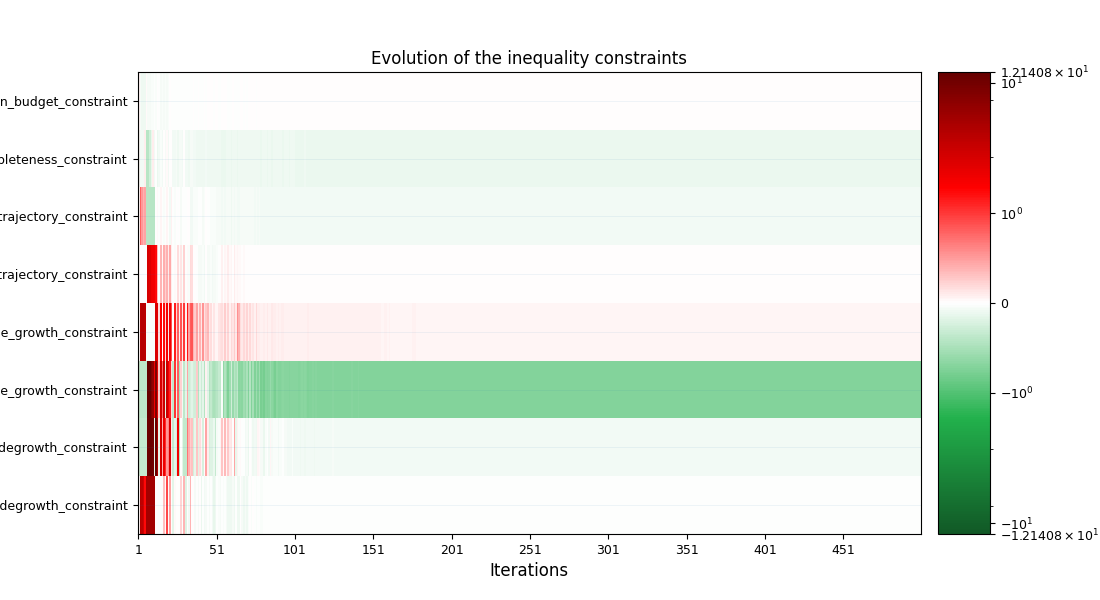

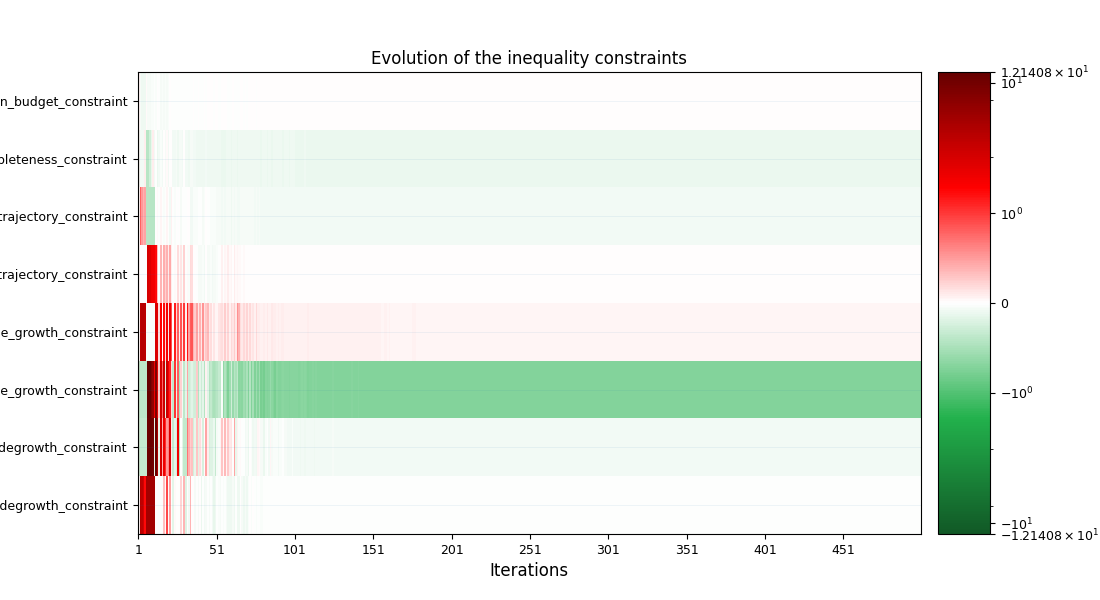

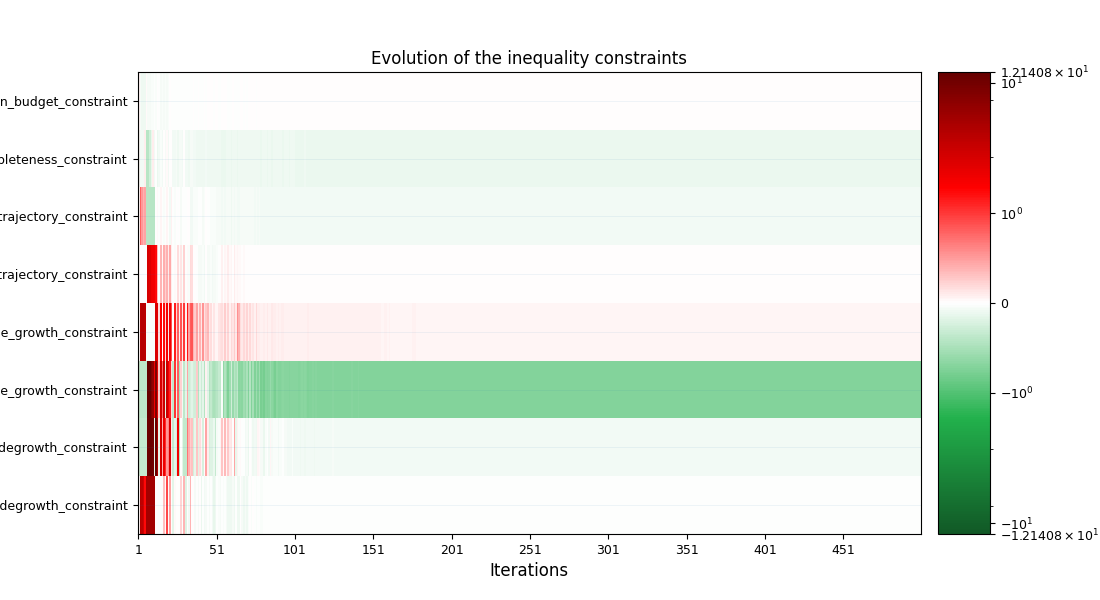

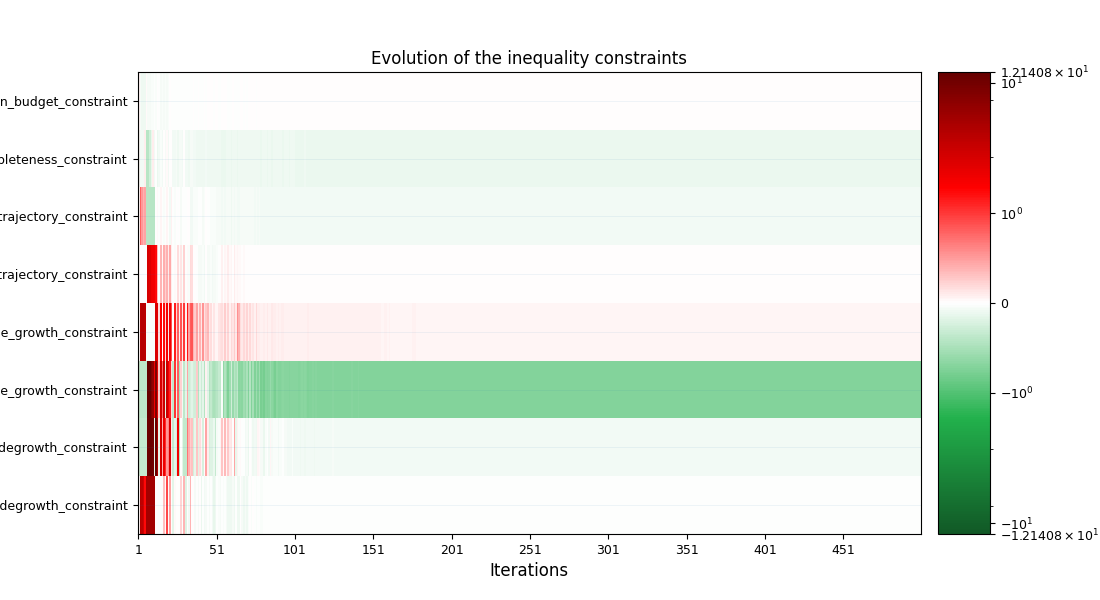

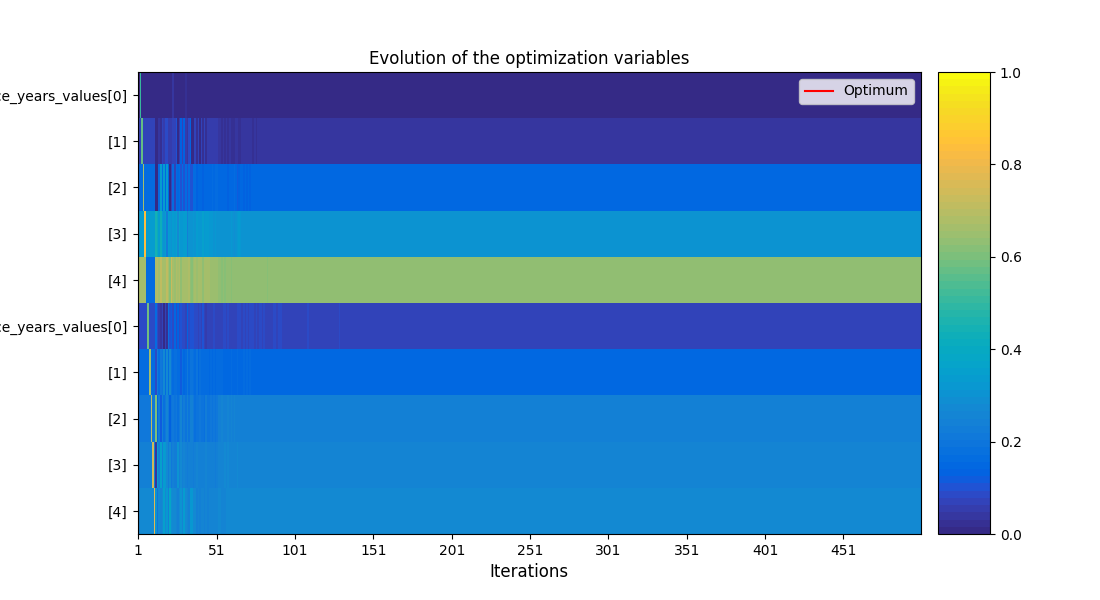

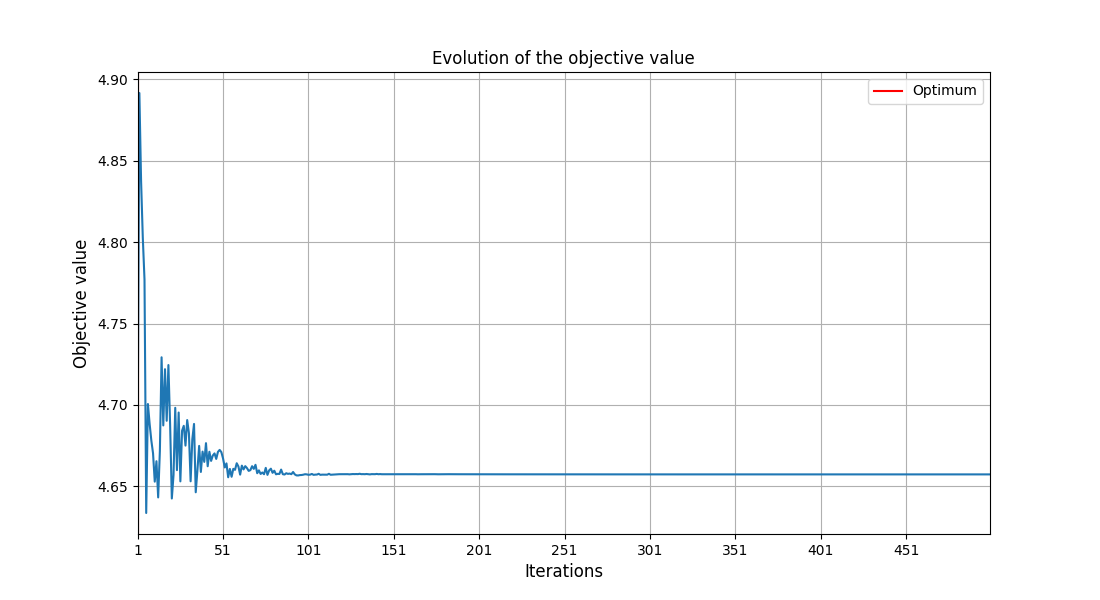

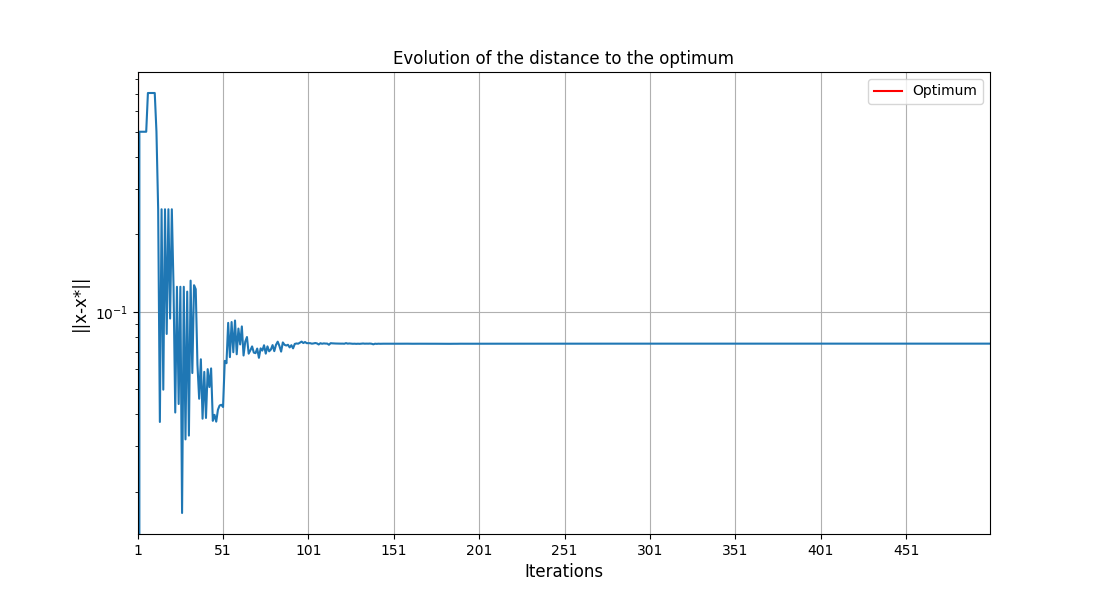

In [66]:
process.scenario.post_process("OptHistoryView", save=False, show=True)

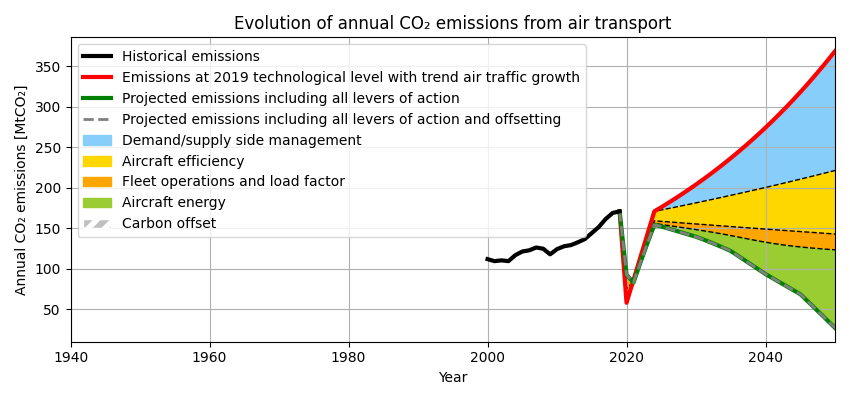

In [67]:
process.plot("air_transport_co2_emissions")

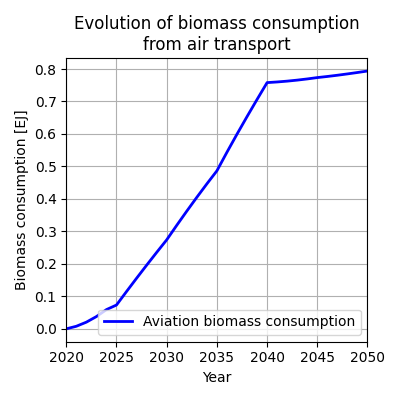

In [68]:
process.plot("biomass_consumption")

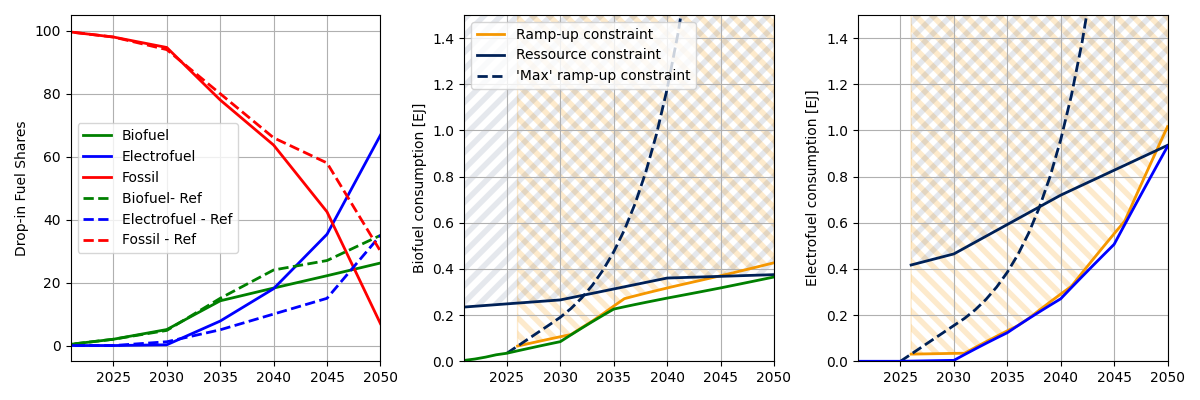

In [71]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "biofuel_share"],
    color="green",
    linestyle="-",
    label="Biofuel",
    linewidth=2,
)

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "electrofuel_share"],
    color="blue",
    linestyle="-",
    label="Electrofuel",
    linewidth=2,
)

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "kerosene_share"],
    color="red",
    linestyle="-",
    label="Fossil",
    linewidth=2,
)


ax1.plot(
    [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    [0, 2, 4.8, 15, 24, 27, 35],
    color="green",
    linestyle="--",
    label="Biofuel- Ref",
    linewidth=2,
)

ax1.plot(
    [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    [0, 0, 1.2, 5, 10, 15, 35],
    color="blue",
    linestyle="--",
    label="Electrofuel - Ref",
    linewidth=2,
)

ax1.plot(
    [2020, 2025, 2030, 2035, 2040, 2045, 2050],
    [100, 98, 94.0, 80, 66, 58, 30],
    color="red",
    linestyle="--",
    label="Fossil - Ref",
    linewidth=2,
)


ax1.grid()
ax1.legend()
ax1.set_ylabel("Drop-in Fuel Shares")
ax1.set_xlim(2021, 2050)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_biofuel_growth_constraint_viz"
    ]
    / 1e12,
    color="#F59700",
    linestyle="-",
    label="Ramp-up constraint",
    linewidth=2,
)

ax2.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_biofuel_growth_constraint_viz"
    ]
    / 1e12,
    3,
    hatch="\\\\",
    edgecolor="#F59700",
    facecolor="none",
    alpha=0.2,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_max_availability_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="-",
    label="Ressource constraint",
    linewidth=2,
)

ax2.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_max_availability_viz"
    ]
    / 1e12,
    3,
    hatch="//",
    edgecolor="#002157",
    facecolor="none",
    linewidth=0,
    alpha=0.1,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_growth_constraint_theoretical_max_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="--",
    label="'Max' ramp-up constraint",
    linewidth=2,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "energy_consumption_biofuel"
    ]
    / 1e12,
    color="green",
    linestyle="-",
    # label="Aviation biofuel consumption",
    linewidth=2,
)


ax2.grid()
# ax2.set_xlabel("Year")
ax2.set_ylabel("Biofuel consumption [EJ]")
ax2.legend(loc="upper left")
ax2.set_xlim(2021, 2050)
ax2.set_ylim(0, 1.5)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_electrofuel_growth_constraint_viz"
    ]
    / 1e12,
    color="#F59700",
    linestyle="-",
    # label="Electrofuel ramp-up constraint",
    linewidth=2,
)

ax3.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_electrofuel_growth_constraint_viz"
    ]
    / 1e12,
    3,
    hatch="\\\\",
    edgecolor="#F59700",
    facecolor="none",
    alpha=0.2,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "electrofuel_max_availability_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="-",
    # label="Electricity availability constraint",
    linewidth=2,
)

ax3.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "electrofuel_max_availability_viz"
    ]
    / 1e12,
    3,
    hatch="//",
    edgecolor="#002157",
    facecolor="none",
    linewidth=0,
    alpha=0.1,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"],
        "electrofuel_growth_constraint_theoretical_max_viz",
    ]
    / 1e12,
    color="#002157",
    linestyle="--",
    # label="Electrofuel theoretical max ramp-Up constraint",
    linewidth=2,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "energy_consumption_electrofuel"
    ]
    / 1e12,
    color="blue",
    linestyle="-",
    # label="Aviation electrofuel consumption",
    linewidth=2,
)


ax3.grid()
ax3.set_ylabel("Electrofuel consumption [EJ]")
ax3.set_xlim(2021, 2050)
ax3.set_ylim(0, 1.5)

fig.tight_layout()
fig.savefig("ressource_constraints.png", dpi=800)

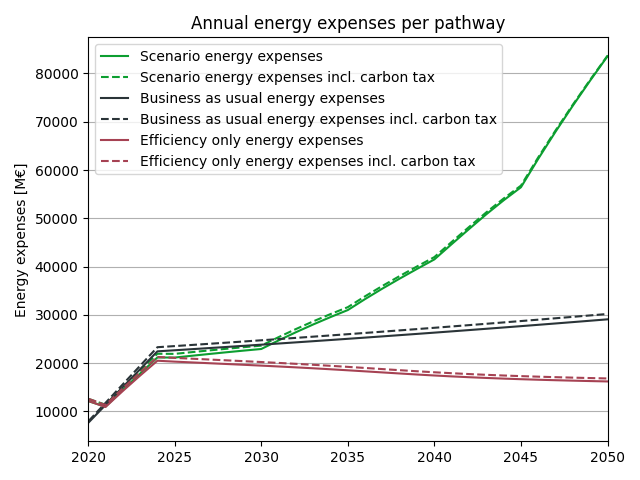

In [55]:
process.plot("energy_expenses_carbon_tax_effect")

In [72]:
process.vector_outputs_df["cumulative_co2_emissions"][2050]

3.217462346009958

In [73]:
process.vector_outputs_df["co2_emissions_including_energy"][2050]

23.324167292337037

In [74]:
process.vector_outputs_df["cumulative_total_airline_cost_discounted"][2050]

4681603674819.736

In [75]:
max(process.vector_outputs_df["electricity_consumption"].dropna())

2.131142293810036

In [76]:
sum(process.vector_outputs_df["electricity_consumption"].dropna())

16.810534355225155

In [77]:
max(process.vector_outputs_df["biomass_consumption"].dropna())

0.7668753288835853

In [78]:
sum(process.vector_outputs_df["biomass_consumption"].dropna())

12.146007988171126

In [32]:
# from gemseo.algos.design_space import DesignSpace
# from gemseo import generate_n2_plot, create_scenario

# manual_DOE_carbon_budgets = [k * europe_ask_share for k in [2.0, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.2, 3.5, 4.0]]
# manual_DOE_results = {}


# for carbon_budget_share in manual_DOE_carbon_budgets:

#     process.parameters.aviation_carbon_budget_objective = carbon_budget_share

#     process.setup()

#     design_space = DesignSpace()

#     # design_space.add_variable("load_factor_end_year", size=1, lower_bound=89.0, upper_bound=89.5, value=89.2)
#     design_space.add_variable("electrofuel_share_reference_years_values", size=7, lower_bound=[0, 0, 0, 0, 0, 0, 0], upper_bound=[0, 100, 100,100, 100, 100, 100], value=[0, 0, 1.2, 5, 10, 15, 35])
#     design_space.add_variable("biofuel_share_reference_years_values", size=7, lower_bound=[0, 0, 0, 0, 0, 0, 0], upper_bound=[0, 100, 100,100, 100, 100, 100], value=[0, 2, 4.8, 15, 24, 27, 35])
#     # design_space.add_variable("biofuel_share_reference_years_values", size=7, lower_bound=np.array([0, 0, 0,0, 0, 0, 0]), upper_bound=np.array([0, 100, 100,100, 100, 100, 100]), value=np.array([0, 0, 1.2, 5, 10, 15, 35]))
#     # design_space.add_variable("biofuel_share_reference_years_values", size=1, lower_bound=1, upper_bound=100, value=5)

#     objective_name = "cumulative_total_airline_cost_discounted_obj"


#     process.gemseo_settings["design_space"] = design_space

#     process.gemseo_settings["objective_name"] = objective_name

#     # process.gemseo_settings["scenario_type"]="DOE"
#     process.gemseo_settings["scenario_type"] = "MDO"

#     # Create a GEMSEO scenario
#     process.create_gemseo_scenario()

#     # Set differention method (only use for gradient based optimizers)
#     process.scenario.set_differentiation_method("finite_differences")

#     # Add constraints
#     all_constraints = [
#         "aviation_carbon_budget_constraint",
#         "blend_completeness_constraint",
#         "electricity_trajectory_constraint",
#         "biomass_trajectory_constraint",
#         "electrofuel_use_growth_constraint",
#         "biofuel_use_growth_constraint",
#         "biofuel_use_no_degrowth_constraint",
#         "electrofuel_use_no_degrowth_constraint"
#     ]


#     for constraint in all_constraints:
#         process.scenario.add_constraint(constraint, constraint_type="ineq")


#     process.scenario.formulation.optimization_problem.objective = process.scenario.formulation.optimization_problem.objective * 1e-12

#     algo_options = {
#         "ftol_rel": 0.001,
#         "ftol_abs": 0.001,
#         "normalize_design_space": True,
#         "init_step":1
#     }
#     # Configure the algorithm used
#     # config_algo = {"algo": "NLOPT_COBYLA", "max_iter": 200}
#     config_algo = {
#         "algo": "NLOPT_COBYLA",
#         "max_iter": 500,
#         "algo_options":algo_options
#     }
#     # config_algo = {"algo": "DIFFERENTIAL_EVOLUTION", "max_iter": 1000}

#     #Configure the DOE used

#     # config_algo = {"algo": "LHS", "n_samples": 1000}


#     process.input_data.update(config_algo)

#     process.compute()

#     manual_DOE_results[carbon_budget_share]=process.scenario.get_result().optimization_problems_to_results



In [33]:
# manual_DOE_results

In [34]:
# {
#   "0.3098": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 0.0200054873, 2.05140066, 21.1813998, 50.2237717, 62.708779, 67.6659455, 0.0, 6.37460003, 13.3005508, 23.9880299, 34.5420461, 38.6414905, 40.5526613],
#         "Objective function": 4.923723348357994,
#         "Feasible solution": false
#       }
#     }
#   },
#   "0.38725000000000004": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 9.50830997e-16, 5.46074505e-15, 4.87835124, 17.8344375, 35.9188935, 44.7192748, 0.0, 6.06082219, 13.16114, 23.2813313, 30.8878381, 35.5180169, 37.1535953],
#         "Objective function": 4.703385363758759,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.40274000000000004": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 5.68528514e-16, 3.52478468e-16, 2.13553207, 11.523514, 27.3651544, 48.9386831, 0.0, 5.57028651, 13.8559199, 14.8875224, 26.9343106, 35.2600772, 37.1299377],
#         "Objective function": 4.65427847765963,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.41823000000000005": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 8.00602614e-15, 0.493206033, 2.15320295, 6.84688915, 16.065036, 35.8409102, 0.0, 5.21639236, 9.54168243, 15.385152, 30.3210818, 35.4914538, 36.6780568],
#         "Objective function": 4.608114408167807,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.43372": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 2.60208521e-15, 2.01227923e-14, 1.90819582e-14, 4.46973153, 14.5540439, 32.7356765, 0.0, 3.12017252, 8.47822827, 13.5795412, 23.1990379, 29.6078295, 34.8518127],
#         "Objective function": 4.569699143108438,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.44921": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 0.11924028, 0.4731823, 3.9455404, 17.04417396, 40.53708351, 56.24505107, 0.0, 0.08376552, 0.67126784, 8.39397436, 15.21908486, 28.46091729, 36.36557437],
#         "Objective function": 4.659503862073434,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.4647": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 5.0497717e-16, 1.71911138e-15, 7.20866319e-15, 5.34337113e-14, 2.77555756e-14, 1.61869054, 0.0, 9.96287534e-15, 2.65478792, 10.1524168, 20.8683498, 32.3839377, 37.0775387],
#         "Objective function": 4.4858105558686425,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.49568000000000006": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 1.209974e-15, 9.07712291e-17, 4.52762243e-17, 0.501961593, 13.5764353, 29.1746387, 0.0, 1.50004538, 10.175401, 20.0427433, 27.2900464, 35.5768404, 37.155043],
#         "Objective function": 4.570591342503452,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.54215": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 1.63064007e-14, 1.83880688e-14, 1.11022302e-14, 6.1409211e-14, 8.46564825, 53.1968294, 0.0, 8.32667268e-15, 6.28789295, 12.7622453, 20.8460642, 30.18929, 31.6952819],
#         "Objective function": 4.555169656402445,
#         "Feasible solution": true
#       }
#     }
#   },
#   "0.6196": {
#     "main": {
#       "Optimization result": {
#         "Design variables": [0.0, 1.63064007e-14, 1.83880688e-14, 1.11022302e-14, 6.1409211e-14, 8.46564825, 53.1968294, 0.0, 8.32667268e-15, 6.28789295, 12.7622453, 20.8460642, 30.18929, 31.6952819],
#         "Objective function": 4.555169656402445,
#         "Feasible solution": true
#       }
#     }
#   }
# }
